# **Classifiers**

◾The following project focus on the analysis of a dataset 'Bank Marketing' which contains data about customers and aims to get useful insights from the data and predict if a new customer will subscribe a term deposit or not.



# Loading Dataset

In [ ]:
import numpy as np
import pandas as pd # data processing
df = pd.read_csv('/content/bank-additional-full.csv', delimiter=';',header = 0)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
cols = df.columns
var_numerical = list(df._get_numeric_data().columns)
var_categorical = list(set(cols) - set(var_numerical) - set('y'))

In [ ]:
# Function to label the count on top of each bar in graph
def label_values(ax, spacing=5):
    total = 0
    for rect in ax.patches:
        total += rect.get_height()

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.2f}, {:.2f}".format(y_value, y_value/total*100)
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                      

# Exploratory Data Analysis

## For Categorial Variables

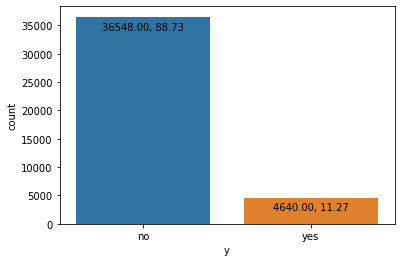

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ax = sns.countplot(x = df["y"]) 
label_values(ax, spacing=-15)
plt.show()

Dataset is highly imbalanced.


Housing


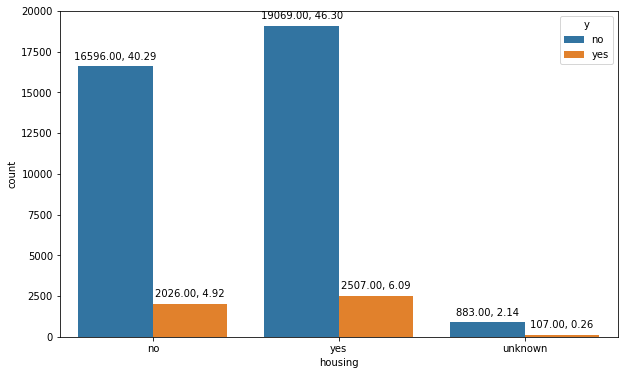

Day_Of_Week


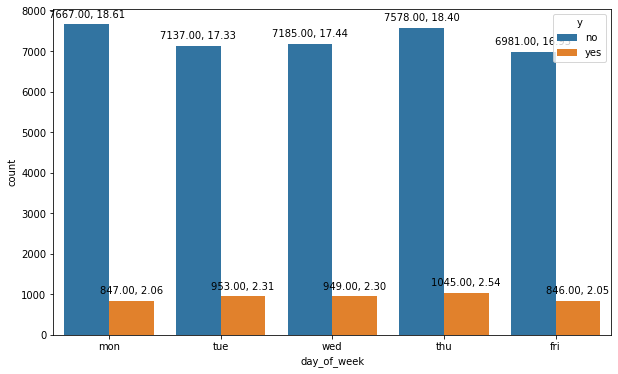

Poutcome


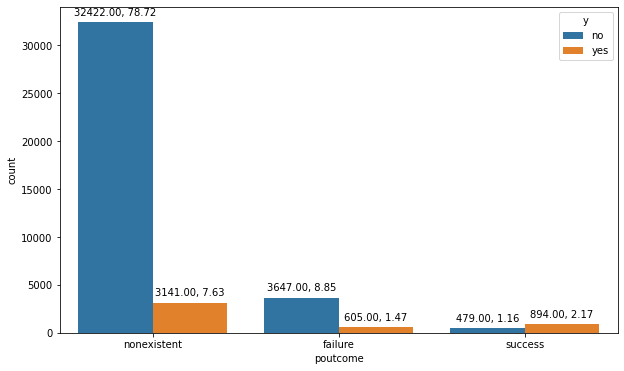

Education


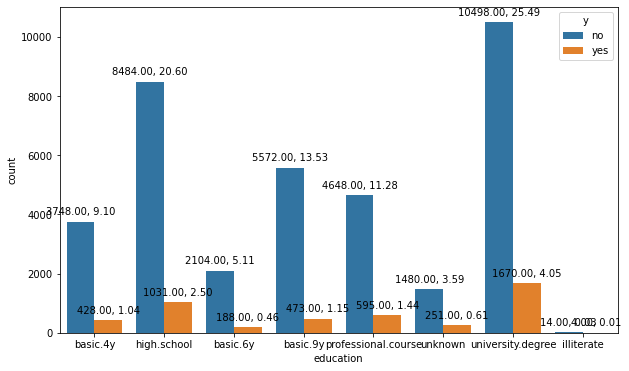

Loan


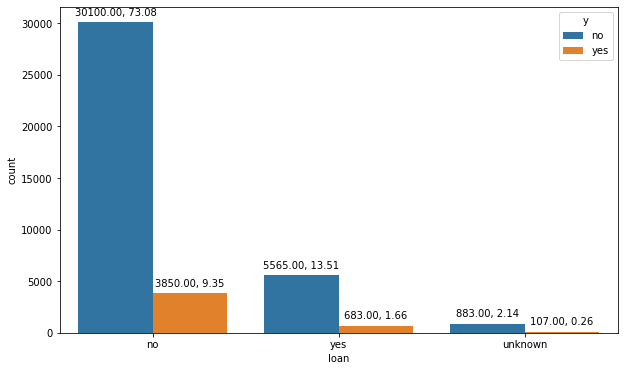

Contact


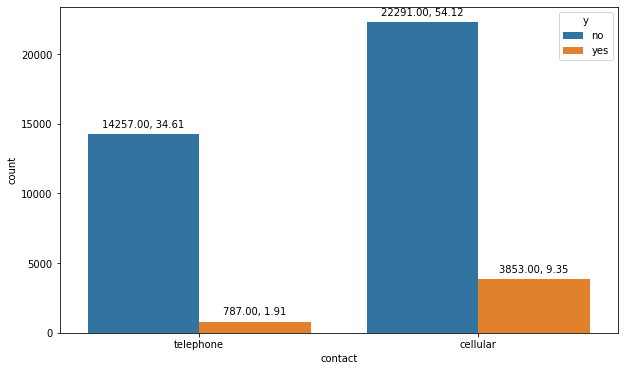

Marital


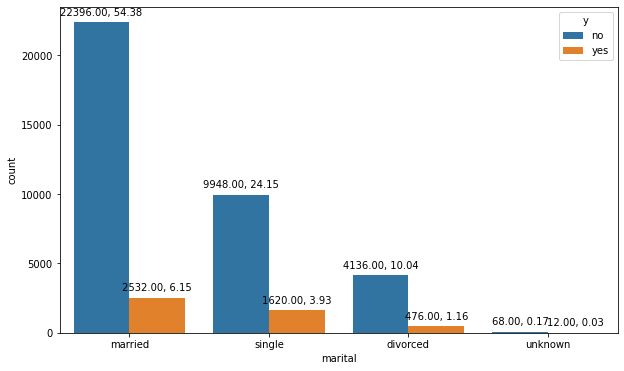

Default


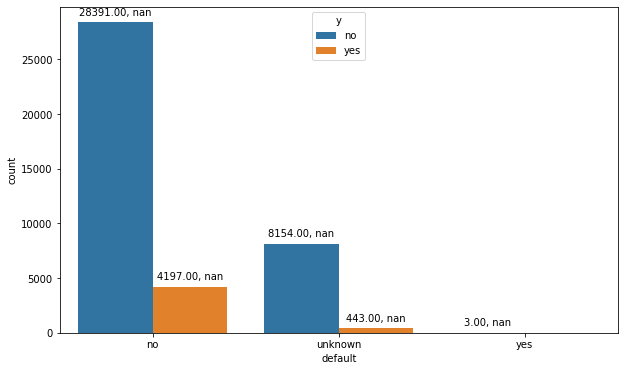

In [ ]:
var = ['housing','day_of_week','poutcome','education','loan','contact','marital','default']
for column in var:
    plt.figure(figsize=(10, 6))
    print(column.title())
    ax = sns.countplot(x = df[column], hue=df["y"])
    label_values(ax)
    plt.show()

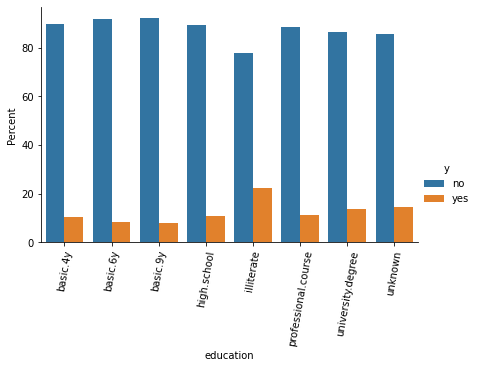

In [ ]:
new_df = df.groupby('education')['y'].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()
g = sns.catplot(x='education', y='Percent', hue='y', kind='bar', data=new_df,height=4, aspect=1.5)
g.set_xticklabels(rotation=80)

In [ ]:
df['education'].value_counts().to_frame()

,education
university.degree,12168
high.school,9515
basic.9y,6045
professional.course,5243
basic.4y,4176
basic.6y,2292
unknown,1731
illiterate,18


1. **Job** : Highest Number (around 25%) of application are from admin type of job.
2. **Default**: Default variable has no impact on the client subscribing for term deposit. *So we will drop this feature.*
3. **Marital**: Around 60% of client were approached were married. 
4. **Education**: Client with university degree and high school were approached more as compare to other and they have higher success rate as well. (in terms of term deposit number)
5. **Housing**: Housing loan does not have much effect on the number of term deposit purchased.
6. **Loan**: We approach around 84% of client with not having personal loan. 
7. **Contact**: Around 64% calls are from cellular.
8.**Month**: Around 33% were approached in may and in January, Febuary we don't have data or no one was approached. Success rate was almost same in june, july and August. 
9. **day_of_week** : We have 5 days collected values. There is no significant different in the number of client approached and number of people subscribed. *So we will drop this feature.*
10. **poutcome**: If a client took the term deposit last time than there is higher chances of that client subscribing to it again.

In [ ]:
# Default variable and Day of week has no impact on the client subscribing for term deposit.
df.drop(["default"], axis = 1, inplace=True)
df.drop(["day_of_week"], axis = 1, inplace=True)


In [ ]:
df.shape

(41188, 19)

## For Numerical Variable

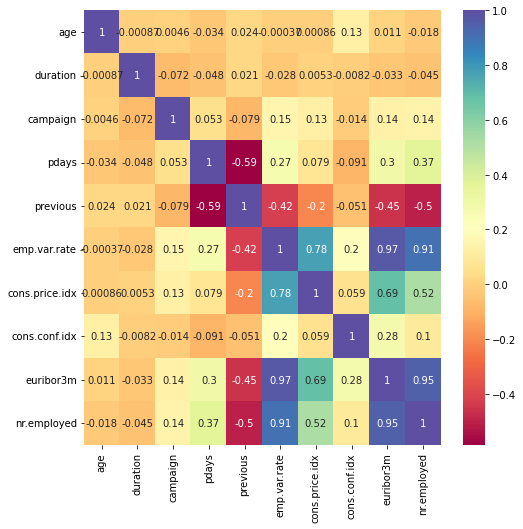

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, cmap='Spectral')
plt.show()

### Handle highly correlated variables

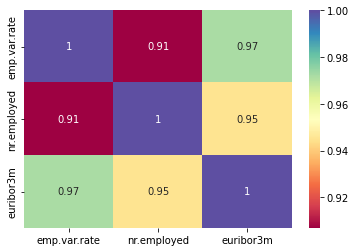

In [ ]:
sns.heatmap(df[["emp.var.rate", "nr.employed", "euribor3m"]].corr(), annot=True, cmap='Spectral')
plt.show()

Positive high correlation between:
1. 'emp.var.rate' and 'nr.employed'
2. 'emp.var.rate' and 'euribor3m'
3. 'euribor3m' and 'nr.employed'

Euribor is the acronym for the Euro Interbank Offered Rate. This is the interest rate at which credit institutions lend money to each other, which is often referred to as “the price of money”.

With this we can say that 'emp.var.rate' (employment variation rate ) and 'nr.employed' (number of employees) are positively correlated with euribor. So we will drop 'emp.var.rate' and 'nr.employed' as 'euribor' also give us the price of money in current market.

In [ ]:
df.drop(['emp.var.rate', 'nr.employed'], axis = 1, inplace=True)


In [ ]:
var_numerical = list(set(var_numerical) - set(['emp.var.rate', 'nr.employed']))

In [ ]:
df[var_numerical].describe()

,cons.conf.idx,pdays,euribor3m,duration,campaign,age,cons.price.idx,previous
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.00000,41188.000000,41188.000000
mean,-40.502600,962.475454,3.621291,258.285010,2.567593,40.02406,93.575664,0.172963
std,4.628198,186.910907,1.734447,259.279249,2.770014,10.42125,0.578840,0.494901
min,-50.800000,0.000000,0.634000,0.000000,1.000000,17.00000,92.201000,0.000000
25%,-42.700000,999.000000,1.344000,102.000000,1.000000,32.00000,93.075000,0.000000
50%,-41.800000,999.000000,4.857000,180.000000,2.000000,38.00000,93.749000,0.000000
75%,-36.400000,999.000000,4.961000,319.000000,3.000000,47.00000,93.994000,0.000000
max,-26.900000,999.000000,5.045000,4918.000000,56.000000,98.00000,94.767000,7.000000


# One Hot Encoding for categorical variables

**Missing Attribute Values**: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.

In [ ]:
# Get the dummy variables for contact, poutcome , job, month, marital,  education
# Let's drop the first column from  using 'drop_first = True' as first column can be derived using other columns 

df['job'] = df['job'].apply(lambda x: -1 if x=='unknown' or x=='unemployed' else (15 if x=='entrepreneur' else (8 if x == 'blue-collar' else ( 6 if x=='technician' or x=='services' or  x=='admin.' or x=='management' else (4 if x== 'self-employed' or x=='student' else (2 if x=='housemaid' or x=='retired' else None) )))))
df['housing'] = df['housing'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
df['loan'] = df['loan'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
df['y'] = df['y'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
df['poutcome'] = df['poutcome'].apply(lambda x: 0 if x=='failure' else (2 if x=='failure' else -1))
df['pdays'] = df['pdays'].apply(lambda x: 0 if x==999 else(20 if x<=10 else(6 if x<=20 else 3)))

df  = pd.get_dummies(df, drop_first = True)

In [ ]:
df.head()

,age,job,housing,loan,duration,campaign,pdays,previous,poutcome,cons.price.idx,...,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,56,2,0,0,261,1,0,0,-1,93.994,...,1,0,0,0,0,0,1,0,0,0
1,57,6,0,0,149,1,0,0,-1,93.994,...,1,0,0,0,0,0,1,0,0,0
2,37,6,1,0,226,1,0,0,-1,93.994,...,1,0,0,0,0,0,1,0,0,0
3,40,6,0,0,151,1,0,0,-1,93.994,...,1,0,0,0,0,0,1,0,0,0
4,56,6,0,1,307,1,0,0,-1,93.994,...,1,0,0,0,0,0,1,0,0,0


# Split Data Into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split
# We will divide the training and testing set in 80% and 20% respectively
# We used random_state = 100 so that everytime we run it we will have same set of training and testing set
df_train, df_test = train_test_split(df, train_size = 0.8, random_state = 100)

## Rescaling the continuous variables

Our data is not normally distributed so we will use MinMaxScaler. It can also handle some of the outliers which we have in our data.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# MinMaxScaler Object
scaler = MinMaxScaler()

# Fit and Transform the data
# Fit will calculate our Min and Max values
# Transform will operate on standardisation function and scales our values
df_train[var_numerical] = scaler.fit_transform(df_train[var_numerical])

# Transform will operate on standardisation function and scales our values
df_test[var_numerical] = scaler.transform(df_test[var_numerical])

## Dividing into X and Y sets for the model building

In [ ]:
# Divide the train data into X and y
y_train = df_train.pop('y')
x_train = df_train

# Divide the test data into X and y
y_test = df_test.pop('y')
x_test = df_test


# Model Building

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,classification_report,plot_confusion_matrix,recall_score
from sklearn.ensemble import RandomForestClassifier



## Decision Tree

In [ ]:
import time
start = time.time()

In [ ]:
dtclf= DecisionTreeClassifier( max_depth=8, criterion='gini',class_weight= {0:2,1:5})
dtclf= dtclf.fit(x_train,y_train)

In [ ]:
y_pred = dtclf.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Recall Score:", recall_score(y_test,y_pred))
print("Precision Score:",precision_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8980335032774945
Recall Score: 0.7652270210409745
Precision Score: 0.5238817285822593
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      7335
           1       0.52      0.77      0.62       903

    accuracy                           0.90      8238
   macro avg       0.75      0.84      0.78      8238
weighted avg       0.92      0.90      0.91      8238



In [ ]:
confusion_matrix(y_test,y_pred)
# the count of true negatives isC_{0,0} , false negatives is C_{1,0},
# true positives isC_{1,1} and false positives is C_{0,1}.

array([[6707,  628],
       [ 212,  691]])

In [ ]:
end = time.time()
print("Total time taken:",(end - start),"seconds")

Total time taken: 0.24132394790649414 seconds


## Naïve Bayes classifier

In [ ]:
start = time.time()

In [ ]:
nbclf = GaussianNB()
nbclf=nbclf.fit(x_train, y_train)


In [ ]:
y_pred = nbclf.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Recall Score:", recall_score(y_test,y_pred))
print("Precision Score:",precision_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8860160233066279
Recall Score: 0.40310077519379844
Precision Score: 0.47643979057591623
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7335
           1       0.48      0.40      0.44       903

    accuracy                           0.89      8238
   macro avg       0.70      0.67      0.69      8238
weighted avg       0.88      0.89      0.88      8238



In [ ]:
confusion_matrix(y_test,y_pred)
# the count of true negatives isC_{0,0} , false negatives is C_{1,0},
# true positives isC_{1,1} and false positives is C_{0,1}.

array([[6935,  400],
       [ 539,  364]])

In [ ]:
end = time.time()
print("Total time taken:",(end - start),"seconds")

Total time taken: 0.13922381401062012 seconds


## Random Forest Classifier

In [ ]:
start = time.time()

In [ ]:
rfclf= RandomForestClassifier(max_depth = 10, max_features= 25, n_estimators= 100,class_weight= {0:2,1:6})
rfclf= rfclf.fit(x_train,y_train)

In [ ]:
y_pred = rfclf.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Recall Score:", recall_score(y_test,y_pred))
print("Precision Score:",precision_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.9083515416363195
Recall Score: 0.7718715393133998
Precision Score: 0.5593900481540931
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      7335
           1       0.56      0.77      0.65       903

    accuracy                           0.91      8238
   macro avg       0.76      0.85      0.80      8238
weighted avg       0.93      0.91      0.91      8238



In [ ]:
confusion_matrix(y_test,y_pred)
# the count of true negatives isC_{0,0} , false negatives is C_{1,0},
# true positives isC_{1,1} and false positives is C_{0,1}.

array([[6786,  549],
       [ 206,  697]])

In [ ]:
end = time.time()
print("Total time taken:",(end - start),"seconds")

Total time taken: 7.548055648803711 seconds


In [ ]:
importances = dtclf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

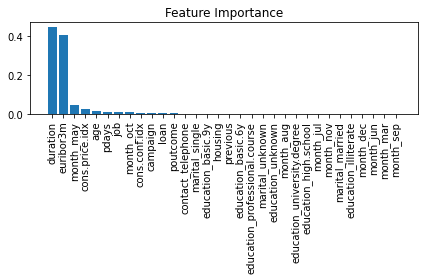

In [ ]:
import matplotlib.pyplot as plt
 
plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(x_train.shape[1]), x_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

# **Report**

     Model             Accuracy     Recall      Precision
     Decision Tree      89.8%        76.5%       52.3% 
     Naive Bayes        88.6%        40.3%       47.6%
     Random Forest      90.8%        77.2%       55.9%




*   Random  Forest perfors better in terms of accuracy

*   Used `class_weight` as a parameter for the decision tree and random forest classifier to give more weight on 'yes' target variable.

*   Choose to increase recall for 'yes' target variable(y)
 but also retained good precision and accuracy.

*   Used `MinMaxScaler` to handle some of the outliers which we have in our data.
 
